In [1]:
#Lince Rumainum
#ISE5123
#HW-3

#Problem 1

  \begin{align}
&\min  c_{i,j} * x_{i,j}\nonumber \\
\mbox{s.t. }&\\ 
& \sum\ x_{i,j}\leq demand_j \nonumber \\
& \sum\ x_{i,j}\leq supply_j \nonumber \\
&\quad c_{i,j}\geq 0 \quad x_{i,j}\geq 0\nonumber\\
&\ i = [A, B] \nonumber \\
&\ j = [1,2,3,4,5] \nonumber \\
\end{align}

In [2]:
#coefficients and parameters
#using lists to store number of retailers and dictionaries to store
#warehouse capacity, cost information, and retailer's demand
warehouses = ["A" , "B"]
retailers = ["retailer1", "retailer2", "retailer3", "retailer4", "retailer5"]
supply = {"A": 2000, "B":3000}
demand = {"retailer1": 500, "retailer2": 800, "retailer3": 1800,
          "retailer4": 300, "retailer5": 700}
cost = {
  ("A", "retailer1"):   2,
  ("A", "retailer2"):   4, 
  ("A", "retailer3"):   5,
  ("A", "retailer4"):   2, 
  ("A", "retailer5"):   1,
  ("B", "retailer1"):   3,
  ("B", "retailer2"):   1, 
  ("B", "retailer3"):   3,
  ("B", "retailer4"):   2, 
  ("B", "retailer5"):   3
}  

In [3]:
#Decision variables
from gurobipy import * 
model = Model("WarehousesToRetailers-Network")

X={} # number of products

for i in warehouses: 
    for j in retailers:
        X[i,j] = model.addVar(vtype=GRB.INTEGER,lb=0,ub=GRB.INFINITY)

model.modelSense = GRB.MINIMIZE                  
model.update()

Using license file C:\Users\Lince\gurobi.lic
Academic license - for non-commercial use only


In [4]:
model.optimize()

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 0 rows, 10 columns and 0 nonzeros
Model fingerprint: 0x2645398d
Variable types: 0 continuous, 10 integer (0 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.04 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


In [5]:
#Print outputs
if model.status==GRB.OPTIMAL:
    print ("The optimal value:", model.objVal)
    print ("Number of products from warehouse to retailers: ")
    for i in warehouses: 
        for j in retailers:
            print ("From Warehouse", i, "to", j, "is", X[i,j].x)

The optimal value: 0.0
Number of products from warehouse to retailers: 
From Warehouse A to retailer1 is -0.0
From Warehouse A to retailer2 is -0.0
From Warehouse A to retailer3 is -0.0
From Warehouse A to retailer4 is -0.0
From Warehouse A to retailer5 is -0.0
From Warehouse B to retailer1 is -0.0
From Warehouse B to retailer2 is -0.0
From Warehouse B to retailer3 is -0.0
From Warehouse B to retailer4 is -0.0
From Warehouse B to retailer5 is -0.0


In [6]:
#Problem 2

  \begin{align}
&\min  c_{i} * x_{i}\nonumber \\
\mbox{s.t. }&\\ 
& \sum\ (pT_i * x_{i}) = 35 \nonumber \\
& \sum\ (pZ_i * x_{i}) = 35 \nonumber \\
& \sum\ (pL_i * x_{i}) = 30 \nonumber \\
& \sum\ x_{i} = 1 \nonumber \\
&\quad c_{i}\geq 0 \quad x_{i}\geq 0\nonumber\\
&\ i = [1,2,3,4,5] \nonumber \\
\end{align}

In [7]:
#coefficients and parameters
properties = ["tin" , "zinc", "lead"]
alloys = ["alloy1", "alloy2", "alloy3", "alloy4", "alloy5"]
#percentage of each property to make new alloy
newAlloyProp = {"tin": 35, "zinc":35, "lead":30} 
cost = {"alloy1": 22, "alloy2": 26, "alloy3": 25,
          "alloy4": 21, "alloy5": 27} # ($/lb)
propAlloyTin = {
  ("alloy1") :   60,
  ("alloy2") :   25, 
  ("alloy3") :   45,
  ("alloy4") :   30, 
  ("alloy5") :   50}
propAlloyZinc = {
  ("alloy1"):   20,
  ("alloy2"):   15, 
  ("alloy3"):   45,
  ("alloy4"):   40, 
  ("alloy5"):   40}
propAlloyLead = {
  ("alloy1"):   20,
  ("alloy2"):   60, 
  ("alloy3"):   10,
  ("alloy4"):   30, 
  ("alloy5"):   10
}  #Percentage of each properties in each alloy

In [8]:
#Decision variables
from gurobipy import * 
model = Model("AlloyBlend")

X={} # weight of alloy used

for i in alloys: 
    X[i] = model.addVar(vtype=GRB.CONTINUOUS,lb=0,ub=GRB.INFINITY)

model.modelSense = GRB.MINIMIZE                  
model.update()

In [9]:
#Constraints

#blend
model.addConstr(quicksum(propAlloyTin[i] * X[i] for i in alloys) == newAlloyProp['tin'])
model.addConstr(quicksum(propAlloyZinc[i] * X[i] for i in alloys) == newAlloyProp['zinc'])   
model.addConstr(quicksum(propAlloyLead[i] * X[i] for i in alloys) == newAlloyProp['lead'])   

#sum of all alloys    
model.addConstr(quicksum(X[i] for i in alloys) == 1 )
                
#non-negativity
for i in alloys:
    model.addConstr(X[i] >= 0) 

#objective function        
# The sum of cost of alloy * weight of alloy
# Sum (c(i) * x(i)) where i = {alloy1, alloy2, alloy3, alloy4, alloy5}
objective = quicksum(cost[i]*X[i] for i in alloys)
 
model.setObjective(objective)

In [10]:
model.optimize()

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 9 rows, 5 columns and 25 nonzeros
Model fingerprint: 0x6d665d8c
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [2e+01, 3e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 4e+01]
Presolve removed 6 rows and 0 columns
Presolve time: 0.04s
Presolved: 3 rows, 5 columns, 15 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2833333e+01   5.208333e+00   0.000000e+00      0s
       3    2.1470588e+01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.06 seconds
Optimal objective  2.147058824e+01


In [11]:
#Print outputs
if model.status==GRB.OPTIMAL:
    print ("The minimum cost of the new alloy:", model.objVal)
    print ("Weigh of each alloy: ")
    for i in alloys: 
        print (i, "'s weight needed (in lbs) is", round(X[i].x,3))

The minimum cost of the new alloy: 21.470588235294116
Weigh of each alloy: 
alloy1 's weight needed (in lbs) is 0.176
alloy2 's weight needed (in lbs) is 0.059
alloy3 's weight needed (in lbs) is 0.0
alloy4 's weight needed (in lbs) is 0.765
alloy5 's weight needed (in lbs) is 0.0


In [12]:
# Problem 3

  \begin{align}
&\min  \ \sum \sum cPW_{ij} * x_{ij} + \sum \sum cWR_{jk} * y_{jk}\nonumber \\
\mbox{s.t. }&\\ 
& \sum y_{jk} = demand_k\nonumber \ \ , \ for \ each \ node \ k \\
& \sum x_{ij} - \sum y_{jk} = 0\nonumber \\
&0\leq x_{ij} \leq u_{ij} \ \ ,\ for \ each \ arc \ i \ to \ j \nonumber \\
&0\leq y_{jk} \leq u_{jk} \ \ ,\ for \ each \ arc \ j \ to \ k \nonumber \\
& \sum x_{jk} \leq supply_{i} \ \ ,\ for \ \ each \ node \ i \\
& i = [1,2] \nonumber \\
& j = [1,2] \nonumber \\
& k = [1,2,3] \nonumber \\
\end{align}

In [13]:
import networkx as nx

#create an directed graph
g=nx.DiGraph()

#add edges
g.add_edge('P1','W1',weight=450)
g.add_edge('P2','W1',weight=510)

g.add_edge('P1','W2',weight=560)
g.add_edge('P2','W2',weight=600)

g.add_edge('W1','RO1',weight=470)
g.add_edge('W2','RO1',weight=390)

g.add_edge('W1','RO2',weight=505)
g.add_edge('W2','RO2',weight=415)

g.add_edge('W1','RO3',weight=495)
g.add_edge('W2','RO3',weight=440)

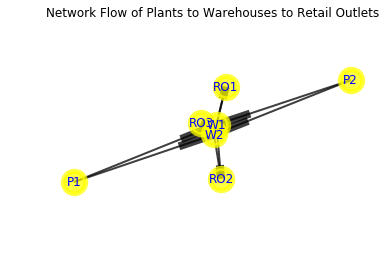

In [35]:
#plot the network
import matplotlib.pyplot as plt
#from networkx.utils import random_state as nxd
#import networkx.drawing.layout as nxd
#nx.draw(g,with_labels=True)
#pos = nx.planar_layout(g)
#nx.draw_networkx_nodes(g, pos= nx.planar_layout(g), node_color='r', with_labels=True)
#nx.draw_networkx_labels(g, pos= nxd.planar_layout(g), label_pos = 0.5)
#nx.draw_networkx_labels(g, pos= nxd.spring_layout(g), label_pos = 0.5)
#nx.draw(g,with_labels=True)
#plt.show()

#type of graph
pos = nx.spring_layout(g) 
fig, ax = plt.subplots()
ax.set_title('Network Flow of Plants to Warehouses to Retail Outlets')
#plt.figure(1,figsize=(80,80)) 
nx.draw_networkx(g, pos, with_labels = True,
                 linewidths =5, 
                 node_size = 500, node_color = 'yellow', alpha = 0.75,
                 width = 2,
                 font_size = 12, font_color = 'blue',
                 font_weight = 'light', 
                 label = True)

plt.axis('off') #turned off axis
plt.show() #show plot

In [36]:
#coefficients and parameters
plants = ["P1", "P2"] #plants
warehouses = ["W1" , "W2"] #warehouses
rOutlets = ["RO1", "RO2", "RO3"] #retail outlets
supply = {"P1": 2000, "P2":3000}
demands = {"RO1": 175, "RO2": 200, "RO3": 150}

# plants to warehouses
shipCost_PW = {
  ("P1", "W1"):   450,
  ("P1", "W2"):   560, 
  ("P2", "W1"):   510,
  ("P2", "W2"):   600,   
}

shipCapacity_PW = {
  ("P1", "W1"):   125,
  ("P1", "W2"):   150, 
  ("P2", "W1"):   175,
  ("P2", "W2"):   200,   
}

shipCpst_WR = {
  ("W1", "RO1"):   470,
  ("W1", "RO2"):   505, 
  ("W1", "RO3"):   495, 
  ("W2", "RO1"):   390,
  ("W2", "RO2"):   415, 
  ("W2", "RO3"):   440,   
}

shipCapacity_WR = {
  ("W1", "RO1"):   100,
  ("W1", "RO2"):   150, 
  ("W1", "RO3"):   100, 
  ("W2", "RO1"):   125,
  ("W2", "RO2"):   150, 
  ("W2", "RO3"):   75,   
}

In [37]:
#decision variables
from gurobipy import * 
model = Model("PWO_Network")
    
X = {} #number of goods that are flowing from plant to dist warehouse
Y = {} #number of goods that are flowing from warehouse to retail outlets

for i in plants: 
    for j in warehouses:
        X[i,j] = model.addVar(vtype=GRB.INTEGER,lb=0,ub=GRB.INFINITY)

for j in warehouses: 
    for k in rOutlets:
        Y[j,k] = model.addVar(vtype=GRB.INTEGER,lb=0,ub=GRB.INFINITY)

model.modelSense = GRB.MINIMIZE                   
model.update()

In [38]:
#demand constraints
for k in rOutlets:    
    model.addConstr(quicksum(Y[j,k] for j in warehouses) == demands[k])   

#maximum flow contraints
for i in plants: 
    for j in warehouses: 
        model.addConstr(X[i,j] <= shipCapacity_PW[i,j]) 

for j in warehouses: 
    for  k in rOutlets:
        model.addConstr(Y[j,k] <= shipCapacity_WR[j,k])         

# maximum capacity 
for i in plants: 
    model.addConstr(quicksum(X[i,j] for j in warehouses) <= supply[i] )  

# Equilibrium 

for j in warehouses:
    model.addConstr(quicksum(X[i,j] for i in plants) - quicksum(Y[j,k] for k in rOutlets) == 0) 

# objective function
objective = quicksum(shipCost_PW[i,j]*X[i,j] for j in warehouses for i in plants) + quicksum(shipCpst_WR[j,k]*Y[j,k] for k in rOutlets for j in warehouses)

model.setObjective(objective)

In [39]:
model.optimize()

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 17 rows, 10 columns and 30 nonzeros
Model fingerprint: 0x313230c4
Variable types: 0 continuous, 10 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+02, 6e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+01, 3e+03]
Presolve removed 17 rows and 10 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.05 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 514250 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.142500000000e+05, best bound 5.142500000000e+05, gap 0.0000%


In [40]:
#Print outputs
if model.status==GRB.OPTIMAL:
    print ("The minimum cost flow:", model.objVal)
    print ("--- Quantity (Plants to Warehouses)---")
    for i in plants: 
        for j in warehouses:
            print ( i, j, X[i,j].x)
    
    print ("--- Quantity (Warehouses to Retail Outlets)---")
    for j in warehouses: 
        for k in rOutlets:
            print (j, k, Y[j,k].x)

The minimum cost flow: 514250.0
--- Quantity (Plants to Warehouses)---
P1 W1 125.0
P1 W2 150.0
P2 W1 125.0
P2 W2 125.0
--- Quantity (Warehouses to Retail Outlets)---
W1 RO1 100.0
W1 RO2 50.0
W1 RO3 100.0
W2 RO1 75.0
W2 RO2 150.0
W2 RO3 50.0


In [41]:
# Problem 4

  \begin{align}
& \min \ \sum \sum cFD_{ij} * x_{ij} + \sum \sum cFW_{ik} * y_{jk} + \sum \sum cDW_{jk} * z_{jk} \nonumber \\
\mbox{s.t. }&\\ 
& \sum y_{ik} + \sum z_{jk} = allocation_k \nonumber \ \ , \ for \ each \ node \ k \\
&0\leq x_{ij} \leq u_{ij} \ \ ,\ for \ each \ arc \ i \ to \ j \nonumber \\
&0\leq y_{ik} \leq u_{ik} \ \ ,\ for \ each \ arc \ i \ to \ k \nonumber \\
&0\leq z_{jk} \leq u_{jk} \ \ ,\ for \ each \ arc \ j \ to \ k \nonumber \\
& \sum x_{ij} \sum y_{ik} \leq supply_{i} \ \ ,\ for \ \ each \ node \ i \\
& \sum x_{ij} - \sum z_{jk} = 0 \nonumber \\
& i = [1,2] \nonumber \\
& j = [1] \nonumber \\
& k = [1,2] \nonumber \\
\end{align}

In [42]:
import networkx as nx
g2 = nx.DiGraph() #create an directed graph

#add edges
g2.add_edge('F1','W1',weight=6)
g2.add_edge('F1','DC',weight=2)
g2.add_edge('DC','W1',weight=3)

g2.add_edge('F2','W2',weight=9)
g2.add_edge('F2','DC',weight=4)
g2.add_edge('DC','W2',weight=4)

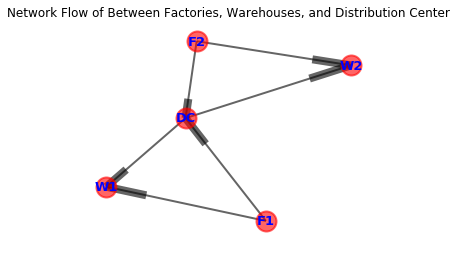

In [43]:
#plot the network
import matplotlib.pyplot as plt
#from networkx.utils import random_state as nxd
#import networkx.drawing.layout as nxd
#nx.draw(g,with_labels=True)
#pos = nx.planar_layout(g)
#nx.draw_networkx_nodes(g, pos= nx.planar_layout(g), node_color='r', with_labels=True)
#nx.draw_networkx_labels(g, pos= nxd.planar_layout(g), label_pos = 0.5)
#nx.draw(g,pos=nx.spring_layout(g),with_labels=True)
#plt.show()

pos = nx.spring_layout(g2) #type of graph
fig, ax = plt.subplots()
ax.set_title('Network Flow of Between Factories, Warehouses, and Distribution Center')
plt.figure(1,figsize=(100,100)) 
nx.draw_networkx(g2,with_labels=True,
                 linewidths =2, node_size = 400, alpha = 0.60,
                 width = 2,
                 font_size = 13, font_color = 'blue',
                 font_weight = 'bold', 
                 label = True)


plt.axis('off') #turned off axis
plt.show() #show plot

In [44]:
#coefficients and parameters
factories = ["F1", "F2"] #factories
warehouses = ["W1" , "W2"] #warehouses
dCenter = ["DC"] #distribution center
supply = {"F1": 80, "F2":70}
allocation = {"W1": 60, "W2": 90}

# plants to warehouses
shipCost_FW = {
  ("F1", "W1"):   6,
  ("F1", "W2"):   0, 
  ("F2", "W1"):   0,
  ("F2", "W2"):   9,  
}
shipCost_FD = {
  ("F1", "DC"):   2,  
  ("F2", "DC"):   4   
}
shipCost_DW= {
  ("DC", "W1"):   3, 
  ("DC", "W2"):   4  
}

shipCapacity_FW = {
  ("F1", "W1"):   80,
  ("F1", "W2"):   0, 
  ("F2", "W1"):   0,
  ("F2", "W2"):   70 
}
shipCapacity_FD = {
  ("F1", "DC"):   50, 
  ("F2", "DC"):   50   
}
shipCapacity_DW= {
  ("DC", "W1"):   50, 
  ("DC", "W2"):   50   
}

In [45]:
#decision variables
from gurobipy import * 
model = Model("FDW_Network")
    
X = {} #number of products that are flowing from factories to dist center
Y = {} #number of products that are flowing from factories to warehouses
Z = {} #number of products that are flowing from dist center to warehouses

for i in factories: 
    for j in dCenter:
        X[i,j] = model.addVar(vtype=GRB.INTEGER,lb=0,ub=GRB.INFINITY)

for i in factories: 
    for k in warehouses:
        Y[i,k] = model.addVar(vtype=GRB.INTEGER,lb=0,ub=GRB.INFINITY)

for j in dCenter: 
    for k in warehouses:
        Z[j,k] = model.addVar(vtype=GRB.INTEGER,lb=0,ub=GRB.INFINITY)
        
model.modelSense = GRB.MINIMIZE                   
model.update()

In [46]:
#allocation constraints
for k in warehouses:    
    model.addConstr(quicksum(Y[i,k] for i in factories) + 
                    quicksum(Z[j,k] for j in dCenter) == allocation[k])   

#maximum flow contraints
for i in factories: #factory to DC
    for j in dCenter:
        model.addConstr(X[i,j] <= shipCapacity_FD[i,j]) 
for i in factories: #factory to warehouse
    for k in warehouses:
        model.addConstr(Y[i,k] <= shipCapacity_FW[i,k])         
for j in dCenter: #DC to warehouse
    for k in warehouses:
        model.addConstr(Z[j,k] <= shipCapacity_DW[j,k]) 

# maximum supply 
for i in factories:    
    model.addConstr(quicksum(X[i,j] for j in dCenter) + 
                    quicksum(Y[i,k] for k in warehouses) <= supply[i] )  

# Equilibrium - transshipment node at DC
for j in dCenter:
    model.addConstr(quicksum(X[i,j] for i in factories) - 
                    quicksum(Z[j,k] for k in warehouses) == 0) 

#objective function
objective = quicksum(shipCost_FD[i,j]*X[i,j] for j in dCenter for i in factories) + quicksum(shipCost_FW[i,k]*Y[i,k] for k in warehouses for i in factories) + quicksum(shipCost_DW[j,k]*Z[j,k] for k in warehouses for j in dCenter)

model.setObjective(objective)

In [47]:
model.optimize()

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 13 rows, 8 columns and 24 nonzeros
Model fingerprint: 0xc1d24968
Variable types: 0 continuous, 8 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 9e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 9e+01]
Presolve removed 13 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.04 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 1050 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.050000000000e+03, best bound 1.050000000000e+03, gap 0.0000%


In [48]:
#Printing outputs
if model.status==GRB.OPTIMAL:
    print ("The minimum cost flow for this network:", model.objVal)

    print ("Number of product from Factory to Distribution Center:")
    for i in factories: 
        for j in dCenter:
            if(X[i,j].x > 0):
                print (i, j, X[i,j].x)
            else:
                print (i, j, 0.00)

    print ("Number of product from Factory to Warehouse:")
    for i in factories: 
        for k in warehouses:
            if(Y[i,k].x > 0):
                print (i, k, Y[i,k].x)
            else:
                print (i, k, 0.00)            
                
    print ("Number of product from Distribution Center to the Warehouse:")
    for j in dCenter: 
        for k in warehouses:
            if(Z[j,k].x > 0):
                print ( j, k, Z[j,k].x)
            else:
                print ( j, k, 0.00)

The minimum cost flow for this network: 1050.0
Number of product from Factory to Distribution Center:
F1 DC 50.0
F2 DC 30.0
Number of product from Factory to Warehouse:
F1 W1 30.0
F1 W2 0.0
F2 W1 0.0
F2 W2 40.0
Number of product from Distribution Center to the Warehouse:
DC W1 30.0
DC W2 50.0
